<a href="https://colab.research.google.com/github/twice1st/Detecting-and-Beautifying-Vietnamese-Faces/blob/main/Source%20code/Classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pickle

# Đọc file Vector embedding

In [ ]:
def _save_pickle(obj, file_path):
  with open(file_path, 'wb') as f:
    pickle.dump(obj, f)

def _load_pickle(file_path):
  with open(file_path, 'rb') as f:
    obj = pickle.load(f)
  return obj

In [ ]:
embedding = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces.pkl")
embedding_sm1 = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm1.pkl")
embedding_sm2 = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm2.pkl")
embedding_v2 = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_v2.pkl")
embedding_sm1_1= _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm1_no_processing.pkl")
embedding_sm2_1= _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm2_no_processing.pkl")
embedding_v2_1= _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_v2_no_processing.pkl")
labels =  _load_pickle("/content/drive/MyDrive/CS231/file/Trong/labels.pkl")

In [ ]:
train_ids =  _load_pickle("/content/drive/MyDrive/CS231/file/Trong/id_train.pkl")
test_ids = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/id_test.pkl")

In [ ]:
test_ids

array([15055, 11117,  4356, ...,  1009,  2982, 17558])

# Tiền xử lý dữ liệu 

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler= StandardScaler()
X = np.array(embedding)
X=X.reshape(19589,1*128)
X = scaler.fit_transform(X)

In [ ]:
def preprocess(embedding, labels):
    X = np.array(embedding)
    X=X.reshape(19589,1*128)
    X = scaler.fit_transform(X)
    y= np.array(labels)
    y = y.astype(np.int)
    X_train= [ X[i] for i in train_ids]
    y_train= [ y[i] for i in train_ids]
    X_test = [ X[i] for i in test_ids]
    y_test = [ y[i] for i in test_ids]
    X_train,y_train,X_test,y_test = np.array(X_train), np.array(y_train),np.array(X_test),np.array(y_test)
    return X_train,y_train,X_test,y_test

# Import SVM từ thư viện scikit-learn

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear')

# Huấn luyện, đánh giá 

In [ ]:
class_names= ["Other","Vietnamese"]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def draw_cf_matrix(cf_matrix, class_names):
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in class_names],
                    columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True,fmt='g')

In [ ]:
def process(embedding, labels):
    X_train,y_train,X_test,y_test= preprocess(embedding, labels)
    model = clf
    #model.summary()
    history= model.fit(X_train, y_train)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    y_pred= y_pred.reshape(y_pred.shape[0])

    y_pred = y_pred.astype('str')
    for i in range(len(y_pred)):
        y_pred[i] = class_names[int(y_pred[i])]

    y_test = y_test.astype('str')
    for i in range (len(y_test)):
        if y_test[i]=='0':
            y_test[i]="Other"
        else:
            y_test[i]="Vietnamese"
    
    print('Classification Report')
    print(classification_report(y_test, y_pred, target_names=class_names))  
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    draw_cf_matrix(cf_matrix, class_names)

#Huấn luyện và đánh giá với hình ảnh chưa qua tiền xử lý

## Kết quả trên nn4.small2.v1

Classification Report
              precision    recall  f1-score   support

       Other       0.63      0.60      0.62      1918
  Vietnamese       0.63      0.67      0.65      2000

    accuracy                           0.63      3918
   macro avg       0.63      0.63      0.63      3918
weighted avg       0.63      0.63      0.63      3918



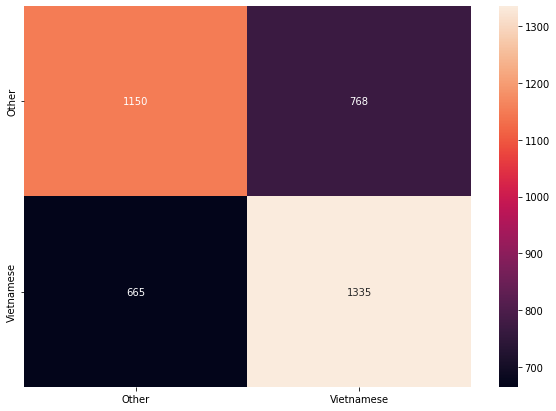

In [ ]:
process(embedding_sm1_1,labels) 

## Kết quả trên nn4.small2.v2

Classification Report
              precision    recall  f1-score   support

       Other       0.65      0.62      0.63      1918
  Vietnamese       0.65      0.68      0.66      2000

    accuracy                           0.65      3918
   macro avg       0.65      0.65      0.65      3918
weighted avg       0.65      0.65      0.65      3918



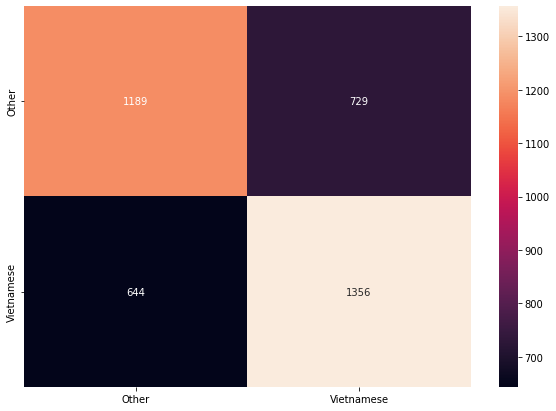

In [ ]:
process(embedding_sm2_1,labels)

##Kết quả trên nn4.v2

Classification Report
              precision    recall  f1-score   support

       Other       0.61      0.53      0.57      1918
  Vietnamese       0.60      0.68      0.64      2000

    accuracy                           0.61      3918
   macro avg       0.61      0.61      0.60      3918
weighted avg       0.61      0.61      0.60      3918



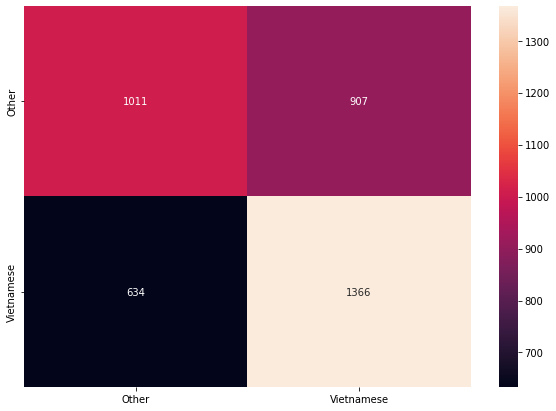

In [ ]:
process(embedding_v2_1,labels)

# Huấn luyện và đánh giá với hình ảnh đã qua tiền xử lý

## Kết quả trên embedding_sm1

Classification Report
              precision    recall  f1-score   support

       Other       0.80      0.79      0.79      1918
  Vietnamese       0.80      0.81      0.81      2000

    accuracy                           0.80      3918
   macro avg       0.80      0.80      0.80      3918
weighted avg       0.80      0.80      0.80      3918



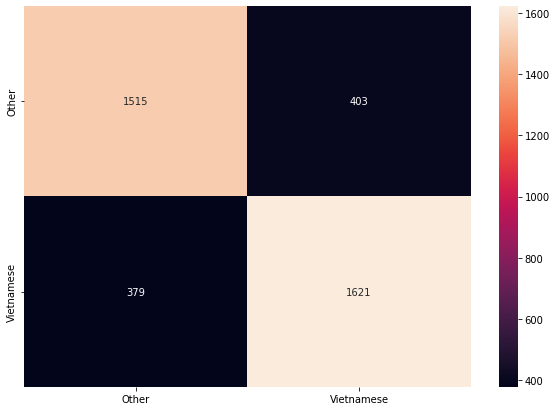

In [ ]:
# process(embedding_sm1,labels)
X_train,y_train,X_test,y_test= preprocess(embedding_sm1, labels)
model = clf
#model.summary()
history= model.fit(X_train, y_train)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred= y_pred.reshape(y_pred.shape[0])

y_pred = y_pred.astype('str')
for i in range(len(y_pred)):
  y_pred[i] = class_names[int(y_pred[i])]

y_test = y_test.astype('str')
for i in range (len(y_test)):
  if y_test[i]=='0':
    y_test[i]="Other"
  else:
    y_test[i]="Vietnamese"
    
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))  
    
cf_matrix = confusion_matrix(y_test, y_pred)
draw_cf_matrix(cf_matrix, class_names)

In [ ]:
a = 0
for i in range(len(y_test)):
  if y_pred[i] != y_test[i]:
    a+=1
a

782

## Kết quả trên embedding_sm2

Classification Report
              precision    recall  f1-score   support

       Other       0.82      0.80      0.81      1918
  Vietnamese       0.81      0.83      0.82      2000

    accuracy                           0.81      3918
   macro avg       0.81      0.81      0.81      3918
weighted avg       0.81      0.81      0.81      3918



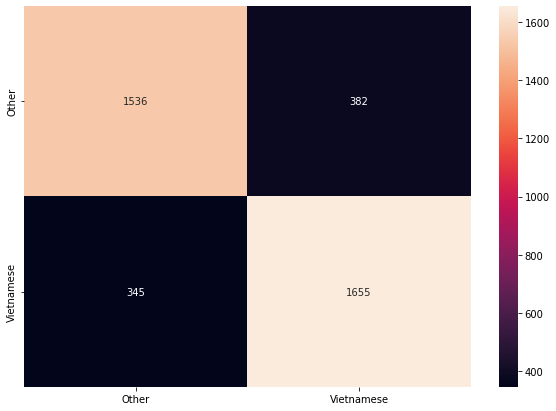

In [ ]:
#process(embedding_sm2,labels)
X_train,y_train,X_test,y_test= preprocess(embedding_sm2, labels)
model = clf
#model.summary()
history= model.fit(X_train, y_train)
with open('/content/drive/MyDrive/CS231/svm.pkl', 'wb') as fid:
    pickle.dump(model, fid)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred= y_pred.reshape(y_pred.shape[0])

y_pred = y_pred.astype('str')
for i in range(len(y_pred)):
  y_pred[i] = class_names[int(y_pred[i])]

y_test = y_test.astype('str')
for i in range (len(y_test)):
  if y_test[i]=='0':
    y_test[i]="Other"
  else:
    y_test[i]="Vietnamese"
    
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))  
    
cf_matrix = confusion_matrix(y_test, y_pred)
draw_cf_matrix(cf_matrix, class_names)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
path_imgs = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/images_file.pkl")

In [ ]:
len(test_ids)

3918

In [ ]:
test_ids

array([15055, 11117,  4356, ...,  1009,  2982, 17558])

In [ ]:
def test(y_pred,path, test_ids, x):
  a = 0
  if x in test_ids:
    for i in range(len(y_pred)):
      if test_ids[i] == x:
        a = i
    print('ket qua:', y_pred[a])
    print(path[x])   
    image = cv2.imread(path[x])
    cv2_imshow(image)
  else:
    print('abc')


ket qua: Other
/content/drive/MyDrive/CS231/data_all/0_7800.png


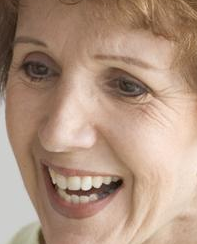

In [ ]:
test(y_pred,path_imgs, test_ids, 17558)

## Kết quả trên embedding_v2

Classification Report
              precision    recall  f1-score   support

       Other       0.76      0.77      0.77      1918
  Vietnamese       0.78      0.77      0.78      2000

    accuracy                           0.77      3918
   macro avg       0.77      0.77      0.77      3918
weighted avg       0.77      0.77      0.77      3918



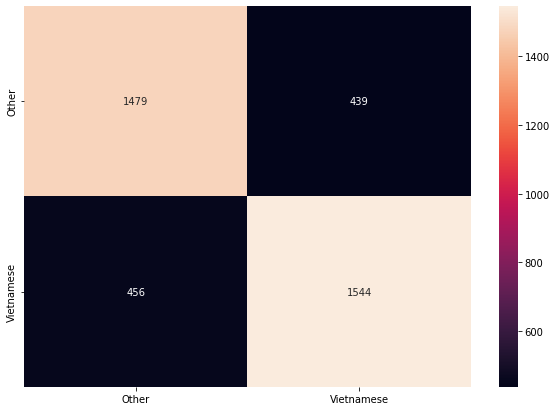

In [ ]:
# process(embedding_v2,labels)
X_train,y_train,X_test,y_test= preprocess(embedding_v2, labels)
model = clf
#model.summary()
history= model.fit(X_train, y_train)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred= y_pred.reshape(y_pred.shape[0])

y_pred = y_pred.astype('str')
for i in range(len(y_pred)):
  y_pred[i] = class_names[int(y_pred[i])]

y_test = y_test.astype('str')
for i in range (len(y_test)):
  if y_test[i]=='0':
    y_test[i]="Other"
  else:
    y_test[i]="Vietnamese"
    
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))  
    
cf_matrix = confusion_matrix(y_test, y_pred)
draw_cf_matrix(cf_matrix, class_names)